### Step_1 : Importing and Understanding Data

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
%matplotlib inline
pd.set_option('display.max_columns',300)
pd.options.display.float_format = '{:.2f}'.format

In [35]:
# Importing csv File
df1 = pd.read_csv('NID_revised_cleanData.csv')

In [36]:
# Looking at the first five rows
df1.head()

,Region,Metro,SiteType,DeploymentType,NIDPM,DPM,IsMainstream,FacilityCode,ClassType,CT,CT_Status,CT_Indicator
0,AMEREAST,Des Moines,DC,Expansion,John Simmons,Dhiraj Take (Tata Consultancy Services Ltd),False,DM4,Class A,226.00,Out-of SLA,Yellow
1,AMEREAST,Des Moines,DC,Expansion,John Simmons,Dhiraj Take (Tata Consultancy Services Ltd),False,DM4,Class A,226.00,Out-of SLA,Yellow
2,AMEREAST,Des Moines,DC,Expansion,John Simmons,Dhiraj Take (Tata Consultancy Services Ltd),False,DM4,Class A,226.00,Out-of SLA,Yellow
3,AMEREAST,Campinas,RNG,Aug,Kathy Brown,Madhvi Chand (Tata Consultancy Services),False,CPQ02,Class C,91.00,With-in SLA,Green
4,AMERWEST,Los Angeles,GW,Upgrade,Darren (Norm) Norman,Rajesh Adimoolam (Tata Consultancy Services Ltd),False,LAX30,Class E,117.00,With-in SLA,Green


In [37]:
# What type of values are stored in the columns?
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1593 entries, 0 to 1592
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          1593 non-null   object 
 1   Metro           1593 non-null   object 
 2   SiteType        1593 non-null   object 
 3   DeploymentType  1593 non-null   object 
 4   NIDPM           1593 non-null   object 
 5   DPM             1593 non-null   object 
 6   IsMainstream    1593 non-null   bool   
 7   FacilityCode    1593 non-null   object 
 8   ClassType       1593 non-null   object 
 9   CT              1593 non-null   float64
 10  CT_Status       1593 non-null   object 
 11  CT_Indicator    1593 non-null   object 
dtypes: bool(1), float64(1), object(10)
memory usage: 138.6+ KB


In [38]:
# Let's look at some statistical information about our dataframe.
df1.describe()

,CT
count,1593.00
mean,363.95
std,241.99
min,3.00
25%,189.00
50%,333.00
75%,463.00
max,1219.00


### Step_2: Visualising Data

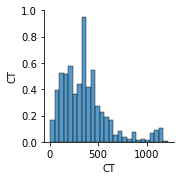

In [39]:
# Let's plot a pair plot of all variables in our dataframe
sns.pairplot(df1.select_dtypes(include='float64'))

In [40]:
df1.columns

Index(['Region', 'Metro', 'SiteType', 'DeploymentType', 'NIDPM', 'DPM',
       'IsMainstream', 'FacilityCode', 'ClassType', 'CT', 'CT_Status',
       'CT_Indicator'],
      dtype='object')

In [41]:
df1['CT_Status'].value_counts(normalize=True)*100

Out-of SLA    68.68
With-in SLA   31.32
Name: CT_Status, dtype: float64

### Step_3: Splitting the Data for Training and Testing

In [42]:
df1['IsMainstream']=df1['IsMainstream'].astype('object')

In [43]:
df2 = df1.drop(['CT_Status','CT_Indicator'], axis=1)

In [44]:
df3=pd.get_dummies(df2, drop_first=True)

In [45]:
df3

,CT,Region_AMERWEST,Region_APAC,Region_EMEA,Metro_Abilene,Metro_Abu Dhabi,Metro_Agriport,Metro_Akron-Canton,Metro_Altus,Metro_Amarillo,Metro_Amsterdam,Metro_Anniston,Metro_Ashburn,Metro_Atlanta,Metro_Auckland,Metro_Austin,Metro_BAY,Metro_Bangkok,Metro_Barcelona,Metro_Baton Rouge,Metro_Bay,Metro_Beaumont,Metro_Beaver Falls,Metro_Beeville,Metro_Beijing,Metro_Berlin,Metro_Bilbao,Metro_Blue Ridge,Metro_Bogota,Metro_Boston,Metro_Boydton,Metro_Breckenridge,Metro_Brussels,Metro_Budapest,Metro_Buenos Aires,Metro_Busan,Metro_CARDIFF,Metro_CLeveland,Metro_Cairo,Metro_Campinas,Metro_Canberra,Metro_Cape Town,Metro_Capetown,Metro_Cardiff,Metro_Charlottesville,Metro_Chattanooga,Metro_Chennai,Metro_Cheyenne,Metro_Chicago,Metro_Chico,Metro_Childress,Metro_Chiloquin,Metro_Cincinnati,Metro_Cleveland,Metro_College Station,Metro_Colorado Springs,Metro_Columbia,Metro_Columbus,Metro_Copenhagen,Metro_Corsicana,Metro_DUBLIN,Metro_Dalhart,Metro_Dallas,Metro_Dallas-Fort Worth,Metro_Dayton,Metro_De Ridder,Metro_Denver,Metro_Des Moines,Metro_Detroit,Metro_Douglas-Bisbee,Metro_Dubai,Metro_Dublin,Metro_El Paso,Metro_Eugene,Metro_FT Worth,Metro_Fort Knox,Metro_Fortaleza,Metro_Frankfurt,Metro_Gary,Metro_Gavle,Metro_Geneva,Metro_Guymon,Metro_Hagerstown,Metro_Halifax,Metro_Hamburg,Metro_Helsinki,Metro_Ho Chi Minh City,Metro_Hong Kong,Metro_Hot Springs,Metro_Houston,Metro_Huntsville,Metro_Hyderabad,Metro_Indianapolis,Metro_Istanbul,Metro_Itasca,Metro_Jacksonville,Metro_Jakarta,Metro_Jamnagar,Metro_Johanessburg,Metro_Johannesburg,Metro_Kelso,Metro_Kiev,Metro_Killala,Metro_Klamath Falls,Metro_Kuala Lumpur,Metro_Lafayette,Metro_Lagos,Metro_Las Vegas,Metro_Laurel,Metro_Lisbon,Metro_Little Rock,Metro_London,Metro_Los Angeles,Metro_Louisville,Metro_Lynchburg,Metro_Madrid,Metro_Malmo,Metro_Manila,Metro_Marseille,Metro_Martinsburg,Metro_Mccomb,Metro_Medford,Metro_Melbourne,Metro_Meridian,Metro_Mexico City,Metro_Miami,Metro_Michigan City,Metro_Milan,Metro_Mineral Wells,Metro_Minneapolis,Metro_Montgomery,Metro_Montreal,Metro_Morgantown,Metro_Moscow,Metro_Mumbai,Metro_Munich,Metro_Nagpur,Metro_Nairobi,Metro_Nashville,Metro_New York,Metro_New York NYC,Metro_Newark,Metro_Norway,Metro_Oakland,Metro_Olympia,Metro_Oroville,Metro_Osaka,Metro_Oslo,Metro_Owensboro,Metro_Palestine,...,FacilityCode_SEL21,FacilityCode_SG1,FacilityCode_SG2,FacilityCode_SG3,FacilityCode_SGE,FacilityCode_SGH01,FacilityCode_SGN30,FacilityCode_SHA,FacilityCode_SHA02,FacilityCode_SHA03,FacilityCode_SHA20,FacilityCode_SIN20,FacilityCode_SIN21,FacilityCode_SIN22,FacilityCode_SIN30,FacilityCode_SIN31,FacilityCode_SJC,FacilityCode_SJC05,FacilityCode_SJC20,FacilityCode_SJC21,FacilityCode_SJC22,FacilityCode_SJC30,FacilityCode_SJT70,FacilityCode_SJT71,FacilityCode_SJT72,FacilityCode_SJT73,FacilityCode_SKS70,FacilityCode_SKS71,FacilityCode_SLA,FacilityCode_SLC01,FacilityCode_SLC02,FacilityCode_SLC03,FacilityCode_SLC04,FacilityCode_SLC70,FacilityCode_SLC71,FacilityCode_SLE70,FacilityCode_SN1,FacilityCode_SN2,FacilityCode_SN3,FacilityCode_SN4,FacilityCode_SN5,FacilityCode_SN6,FacilityCode_SN7,FacilityCode_SNS01,FacilityCode_SOD70,FacilityCode_SPS01,FacilityCode_STA70,FacilityCode_STB,FacilityCode_STO,FacilityCode_STO30,FacilityCode_STO31,FacilityCode_STO70,FacilityCode_STO71,FacilityCode_SVG20,FacilityCode_SXL70,FacilityCode_SXL71,FacilityCode_SYD,FacilityCode_SYD03,FacilityCode_SYD21,FacilityCode_SYD22,FacilityCode_SYD23,FacilityCode_SYD24,FacilityCode_SYD25,FacilityCode_SYD26,FacilityCode_SYD27,FacilityCode_SZP01,FacilityCode_TEB30,FacilityCode_TK5,FacilityCode_TKF01,FacilityCode_TLV30,FacilityCode_TNU70,FacilityCode_TPE30,FacilityCode_TPE31,FacilityCode_TPL01,FacilityCode_TUF70,FacilityCode_TUF71,FacilityCode_TUS01,FacilityCode_TUS02,FacilityCode_TUS03,FacilityCode_TWF01,FacilityCode_TXK01,FacilityCode_TXK02,FacilityCode_TYO02,FacilityCode_TYO20,FacilityCode_TYO21,FacilityCode_TYO22,FacilityCode_TYO30,FacilityCode_TYO31,FacilityCode_TYO33,FacilityCode_TYO70,FacilityCode_TYO71,FacilityCode_TYO72,FacilityCode_TYO7

In [46]:
# Putting feature variable to X
x = df3.drop('CT', axis=1)

# Putting response variable to y
y = df3['CT']

In [19]:
#random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=100)

### Step_4 : Performing Linear Regression

In [47]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
x_train = sm.add_constant(x_train)
# create a fitted model in one line
lm = sm.OLS(y_train,x_train.astype(float))
lm_result=lm.fit()

### Step_5 : Model Evaluation

In [48]:
# print the coefficients
print(lm_result.summary())

                            OLS Regression Results                            
Dep. Variable:                     CT   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     3.736
Date:                Tue, 16 Feb 2021   Prob (F-statistic):           1.55e-41
Time:                        18:50:40   Log-Likelihood:                -6516.9
No. Observations:                1115   AIC:                         1.450e+04
Df Residuals:                     382   BIC:                         1.818e+04
Df Model:                         732                                         
Covariance Type:            nonrobust                                         
                                                                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

### Step_6 : Predictions

In [49]:
# Making predictions using the model
y_pred_train = lm_result.predict(x_train)
y_pred_test = lm_result.predict(sm.add_constant(x_test))

### Step_7: Calculating Error Terms

In [50]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
MAE_train = mean_absolute_error(y_train, y_pred_train)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
MAE_test = mean_absolute_error(y_test, y_pred_test)

In [51]:
y_pred_test.to_csv('y_pred_test.csv')
y_test.to_csv('y_test.csv')

In [52]:
print('rmse_train :',rmse_train, 'MAE_train', MAE_train)
print('rmse_test :',rmse_test, 'MAE_test', MAE_test)

rmse_train : 83.58193625370936 MAE_train 48.055215154723356
rmse_test : 238.17690926163306 MAE_test 166.18619246915267


Text(0, 0.5, 'Cycle Time')

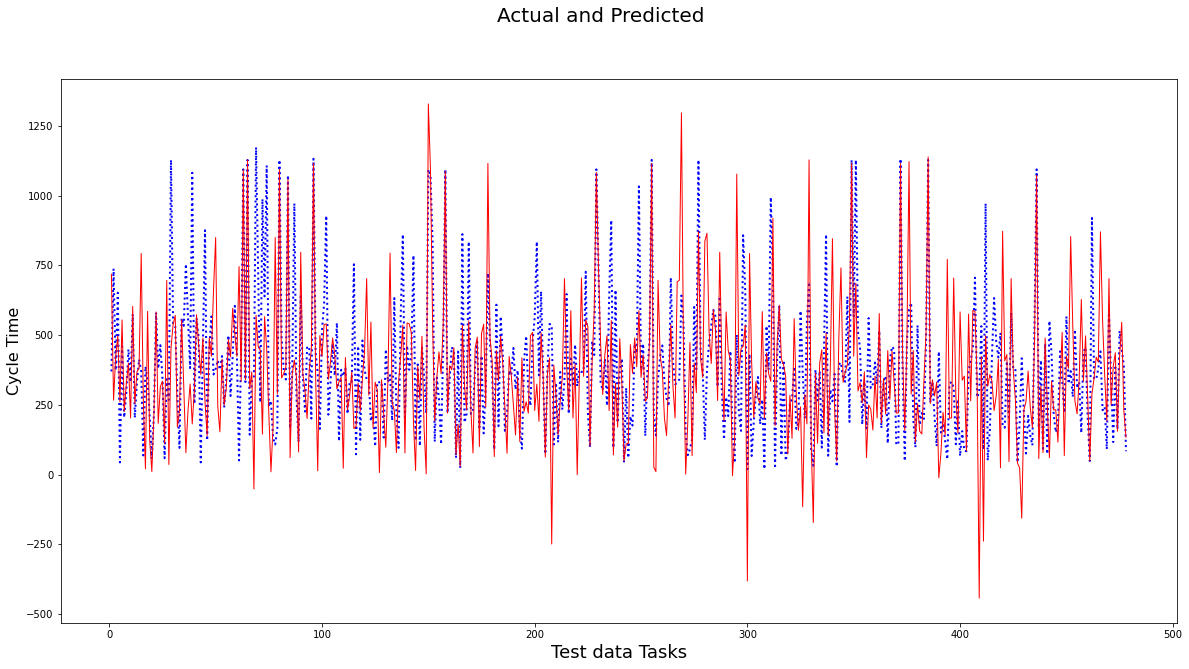

In [53]:
#### Actual vs Predicted
c = [i for i in range(1,479,1)]
fig = plt.figure(figsize=(20,10))
plt.plot(c,y_test, color="blue", linewidth=2, linestyle=":")
plt.plot(c,y_pred_test, color="red",  linewidth=1, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Test data Tasks', fontsize=18)                               # X-label
plt.ylabel('Cycle Time', fontsize=16)                             # Y-label

In [54]:
x_test.shape

(478, 1091)

Text(0, 0.5, 'Error')

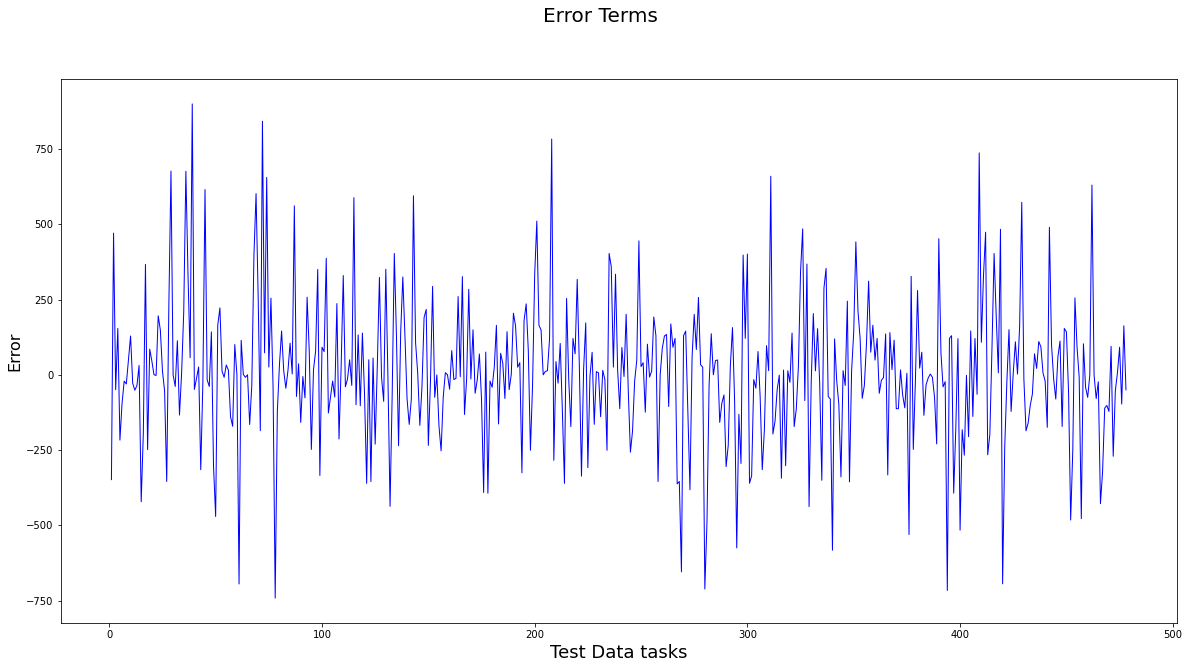

In [55]:
# Error terms
c = [i for i in range(1,479,1)]
fig = plt.figure(figsize=(20,10))
plt.plot(c,y_test-y_pred_test, color="blue", linewidth=1, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Test Data tasks', fontsize=18)                      # X-label
plt.ylabel('Error', fontsize=16)                # Y-label

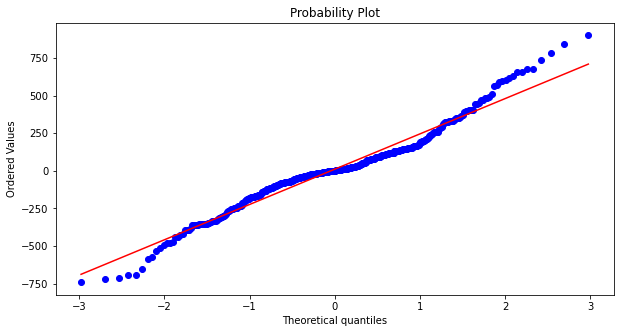

In [56]:
import scipy.stats as stats
import pylab
fig = plt.figure(figsize=(10,5))
stats.probplot(y_test-y_pred_test, dist="norm", plot=pylab)
pylab.show()

C:\Users\v-akrupl\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

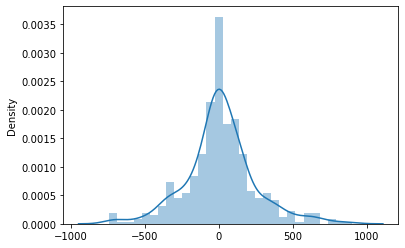

In [57]:
sns.distplot(y_test-y_pred_test)

# Using Random Forest

In [59]:
# Putting feature variable to X
x = df2.drop(['CT'], axis=1)

# Putting response variable to y
y = df2['CT']

In [66]:
le=LabelEncoder()
x_lencoded= x.apply(le.fit_transform)

In [67]:
x_lencoded

,Region,Metro,SiteType,DeploymentType,NIDPM,DPM,IsMainstream,FacilityCode,ClassType
0,0,64,2,5,15,12,0,211,0
1,0,64,2,5,15,12,0,211,0
2,0,64,2,5,15,12,0,211,0
3,0,36,5,1,16,32,0,170,2
4,1,109,4,17,6,46,0,379,4
...,...,...,...,...,...,...,...,...,...
1588,3,68,2,10,3,56,1,233,0
1589,2,183,2,5,35,49,0,675,2
1590,2,149,4,10,35,23,0,520,5
1591,2,176,5,1,35,31,0,615,2


In [68]:
#random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_lencoded, y, train_size=0.7, random_state=100)

In [69]:
# Initialize and fit regressor
tree2 = RandomForestRegressor(criterion='mse', n_estimators=100)         
tree2.fit(x_train, y_train)

RandomForestRegressor()

In [70]:
#prediction
y_train_predict=tree2.predict(x_train)
y_test_predict=tree2.predict(x_test)

In [71]:
#Error calculation
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_predict))
train_MAE = mean_absolute_error(y_train, y_train_predict)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_predict))
test_MAE = mean_absolute_error(y_test, y_test_predict)

In [72]:
print('rmse_train :',train_rmse, 'MAE_train', train_MAE)
print('rmse_test :',test_rmse, 'MAE_test', test_MAE)

rmse_train : 61.616931520415726 MAE_train 39.43689652191356
rmse_test : 167.09945897087664 MAE_test 108.02405411557295


In [73]:
pd.DataFrame({'gini':tree2.feature_importances_, 'varname':x_train.columns}).sort_values('gini', ascending=False)

,gini,varname
5,0.20,DPM
3,0.19,DeploymentType
4,0.14,NIDPM
7,0.13,FacilityCode
2,0.11,SiteType
1,0.09,Metro
0,0.07,Region
8,0.07,ClassType
6,0.00,IsMainstream


In [74]:
importances=tree2.feature_importances_

In [75]:
for feature in zip (x.columns, importances):
    print (feature)

('Region', 0.06900177322332263)
('Metro', 0.0939765824126188)
('SiteType', 0.11203034547155001)
('DeploymentType', 0.1863994694658065)
('NIDPM', 0.13737298053806418)
('DPM', 0.19648137965553014)
('IsMainstream', 0.00355761047084493)
('FacilityCode', 0.13275104510186156)
('ClassType', 0.06842881366040114)


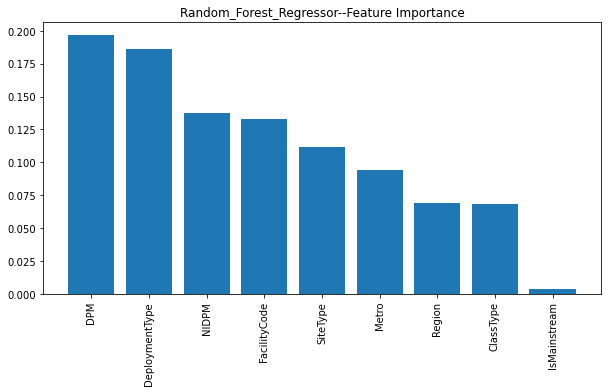

In [77]:
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [x.columns[i] for i in indices]

# Create plot
plt.figure(figsize=(10,5))

# Create plot title
plt.title("Random_Forest_Regressor--Feature Importance")

# Add bars
plt.bar(range(x.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(x.shape[1]), names, rotation=90)

# Show plot
plt.show()